In [22]:
from keras.datasets import imdb
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from keras.models import Model,Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [53]:
((X_train,y_train),(X_test,y_test)) = imdb.load_data(num_words=10000)

In [54]:
word_index = imdb.get_word_index()

In [55]:
index_words = dict([value,key] for (key,value) in word_index.items())

In [56]:
actual_review = " ".join([index_words.get(idx-3,"$") for idx in X_train[0]])
print(actual_review)

$ this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert $ is an amazing actor and now the same being director $ father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for $ and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also $ to the two little boy's that played the $ of norman and paul they were just brilliant children are often left out of the $ list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [57]:
def vectorize(X,dim=10000):
    output = np.zeros((len(X),dim))
    
    for i,idx in enumerate(X):
        output[i][idx] = 1
    return output

X_train = vectorize(X_train)
X_test = vectorize(X_test)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')


In [58]:
model = Sequential()
model.add(Dense(16,activation="relu",input_shape=(10000,)))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",metrics=["accuracy"],loss="binary_crossentropy")

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [59]:
X_val = X_train[:5000] 
X_train_new = X_train[5000:]

y_val = y_train[:5000]
y_train_new = y_train[5000:]

In [49]:
history = model.fit(X_train_new,y_train_new,epochs=20,batch_size=512,validation_data=(X_val,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 5s 267us/step - loss: 0.5234 - accuracy: 0.7853 - val_loss: 0.3527 - val_accuracy: 0.8754
Epoch 2/20
20000/20000 [==============================] - 3s 156us/step - loss: 0.2682 - accuracy: 0.9092 - val_loss: 0.2797 - val_accuracy: 0.8914
Epoch 3/20
20000/20000 [==============================] - 4s 194us/step - loss: 0.1907 - accuracy: 0.9356 - val_loss: 0.2699 - val_accuracy: 0.8924
Epoch 4/20
20000/20000 [==============================] - 3s 170us/step - loss: 0.1497 - accuracy: 0.9518 - val_loss: 0.2787 - val_accuracy: 0.8914
Epoch 5/20
20000/20000 [==============================] - 3s 144us/step - loss: 0.1200 - accuracy: 0.9639 - val_loss: 0.2933 - val_accuracy: 0.8892
Epoch 6/20
20000/20000 [==============================] - 3s 165us/step - loss: 0.0977 - accuracy: 0.9718 - val_loss: 0.3147 - val_accuracy: 0.8868
Epoch 7/20
20000/20000 [==============================] - 3s 17

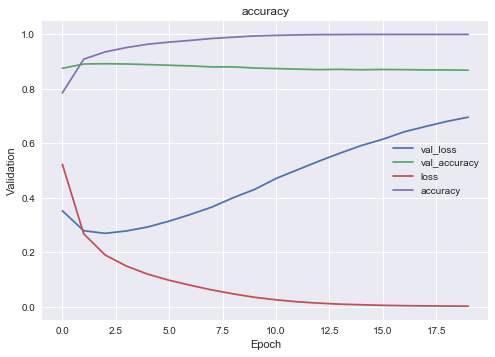

In [50]:
for key,values in (history.history).items():
    plt.plot(values,label = key)
    plt.xlabel("Epoch")
    plt.ylabel("Validation")
    plt.legend()
    plt.title(key)
    #plt.show()

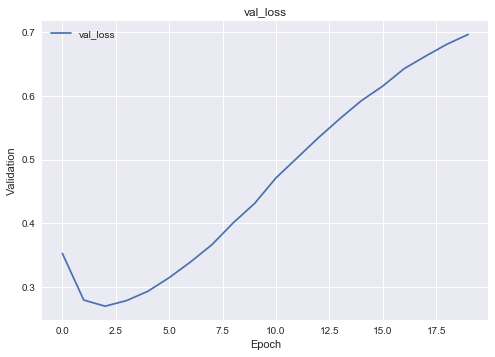

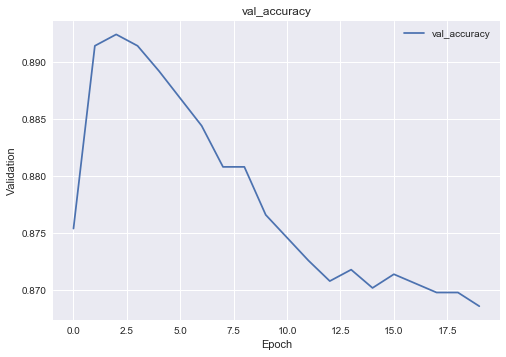

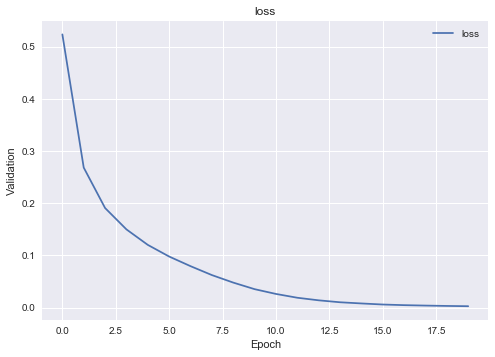

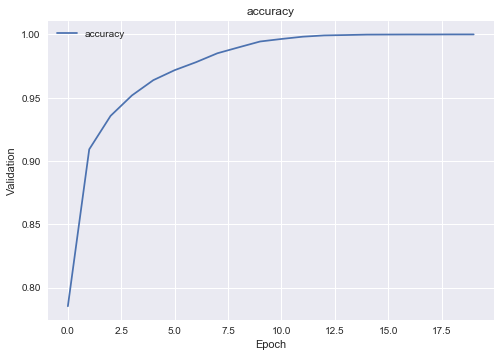

In [51]:
for key,values in (history.history).items():
    plt.plot(values,label = key)
    plt.xlabel("Epoch")
    plt.ylabel("Validation")
    plt.legend()
    plt.title(key)
    plt.show()

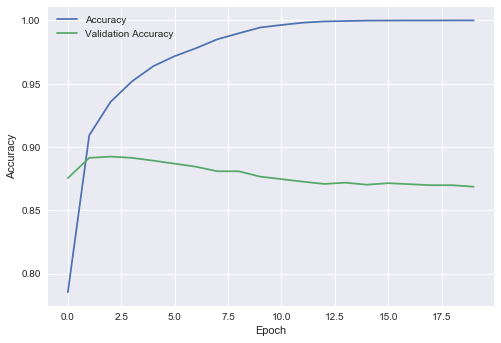

In [52]:
plt.plot(history.history["accuracy"],label = "Accuracy")
plt.plot(history.history["val_accuracy"],label = 'Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [60]:
history = model.fit(X_train_new,y_train_new,epochs=4,batch_size=512,validation_data = (X_val,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 4s 204us/step - loss: 0.5268 - accuracy: 0.7868 - val_loss: 0.3565 - val_accuracy: 0.8714
Epoch 2/4
20000/20000 [==============================] - 4s 198us/step - loss: 0.2692 - accuracy: 0.9067 - val_loss: 0.2795 - val_accuracy: 0.8904
Epoch 3/4
20000/20000 [==============================] - 3s 174us/step - loss: 0.1902 - accuracy: 0.9352 - val_loss: 0.2720 - val_accuracy: 0.8902
Epoch 4/4
20000/20000 [==============================] - 3s 138us/step - loss: 0.1506 - accuracy: 0.9495 - val_loss: 0.2832 - val_accuracy: 0.8852


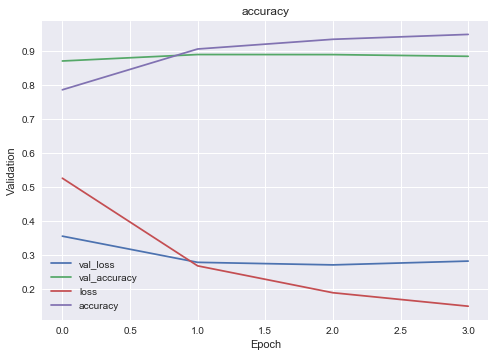

In [61]:
for key,values in (history.history).items():
    plt.plot(values,label = key)
    plt.xlabel("Epoch")
    plt.ylabel("Validation")
    plt.legend()
    plt.title(key)
    #plt.show()

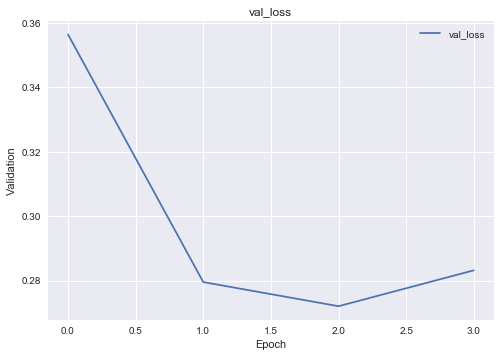

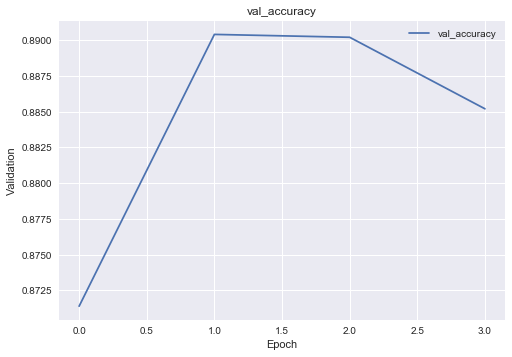

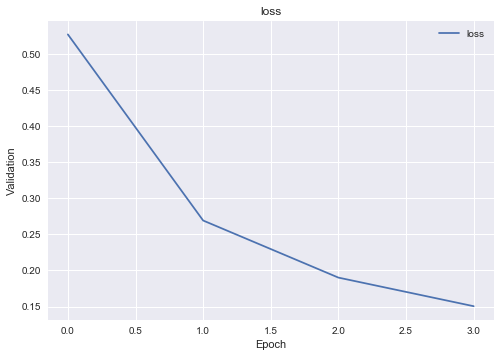

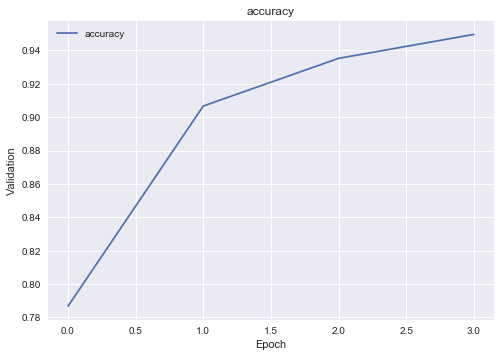

In [62]:
for key,values in (history.history).items():
    plt.plot(values,label = key)
    plt.xlabel("Epoch")
    plt.ylabel("Validation")
    plt.legend()
    plt.title(key)
    plt.show()

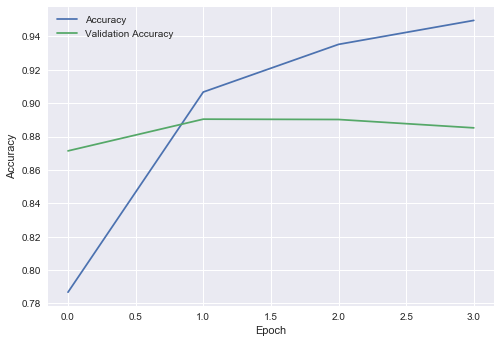

In [63]:
plt.plot(history.history["accuracy"],label = "Accuracy")
plt.plot(history.history["val_accuracy"],label = 'Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [64]:
loss,accuracy = model.evaluate(X_test,y_test)

25000/25000 [==============================] - 5s 208us/step


In [65]:
print("Testing Accuracy = ",accuracy*100)

Testing Accuracy =  87.7839982509613


In [66]:
loss,accuracy = model.evaluate(X_train,y_train)

25000/25000 [==============================] - 5s 218us/step


In [67]:
print("Training Accuracy = ",accuracy*100)

Training Accuracy =  94.8360025882721
